<a href="https://colab.research.google.com/github/Usama-zia/Happy-Customers/blob/master/notebooks/Data_Analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries and Load/prepare Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
#shape of dataset
df.shape

(126, 7)

In [ ]:
#checking for empty cells
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [ ]:
#checking for duplicate rows
df.duplicated().sum()

16

In [ ]:
#removing duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(110, 7)

# Exploratory Data Analysis

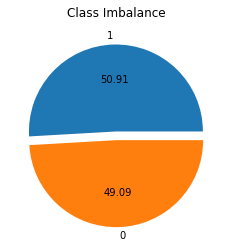

In [ ]:
#Checking for dataset Imbalance (Slight imbalnce in dataset)
plt.pie(df['Y'].value_counts(),labels=df['Y'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

Text(0.5, 0.98, 'Visualizing Continuous Columns')

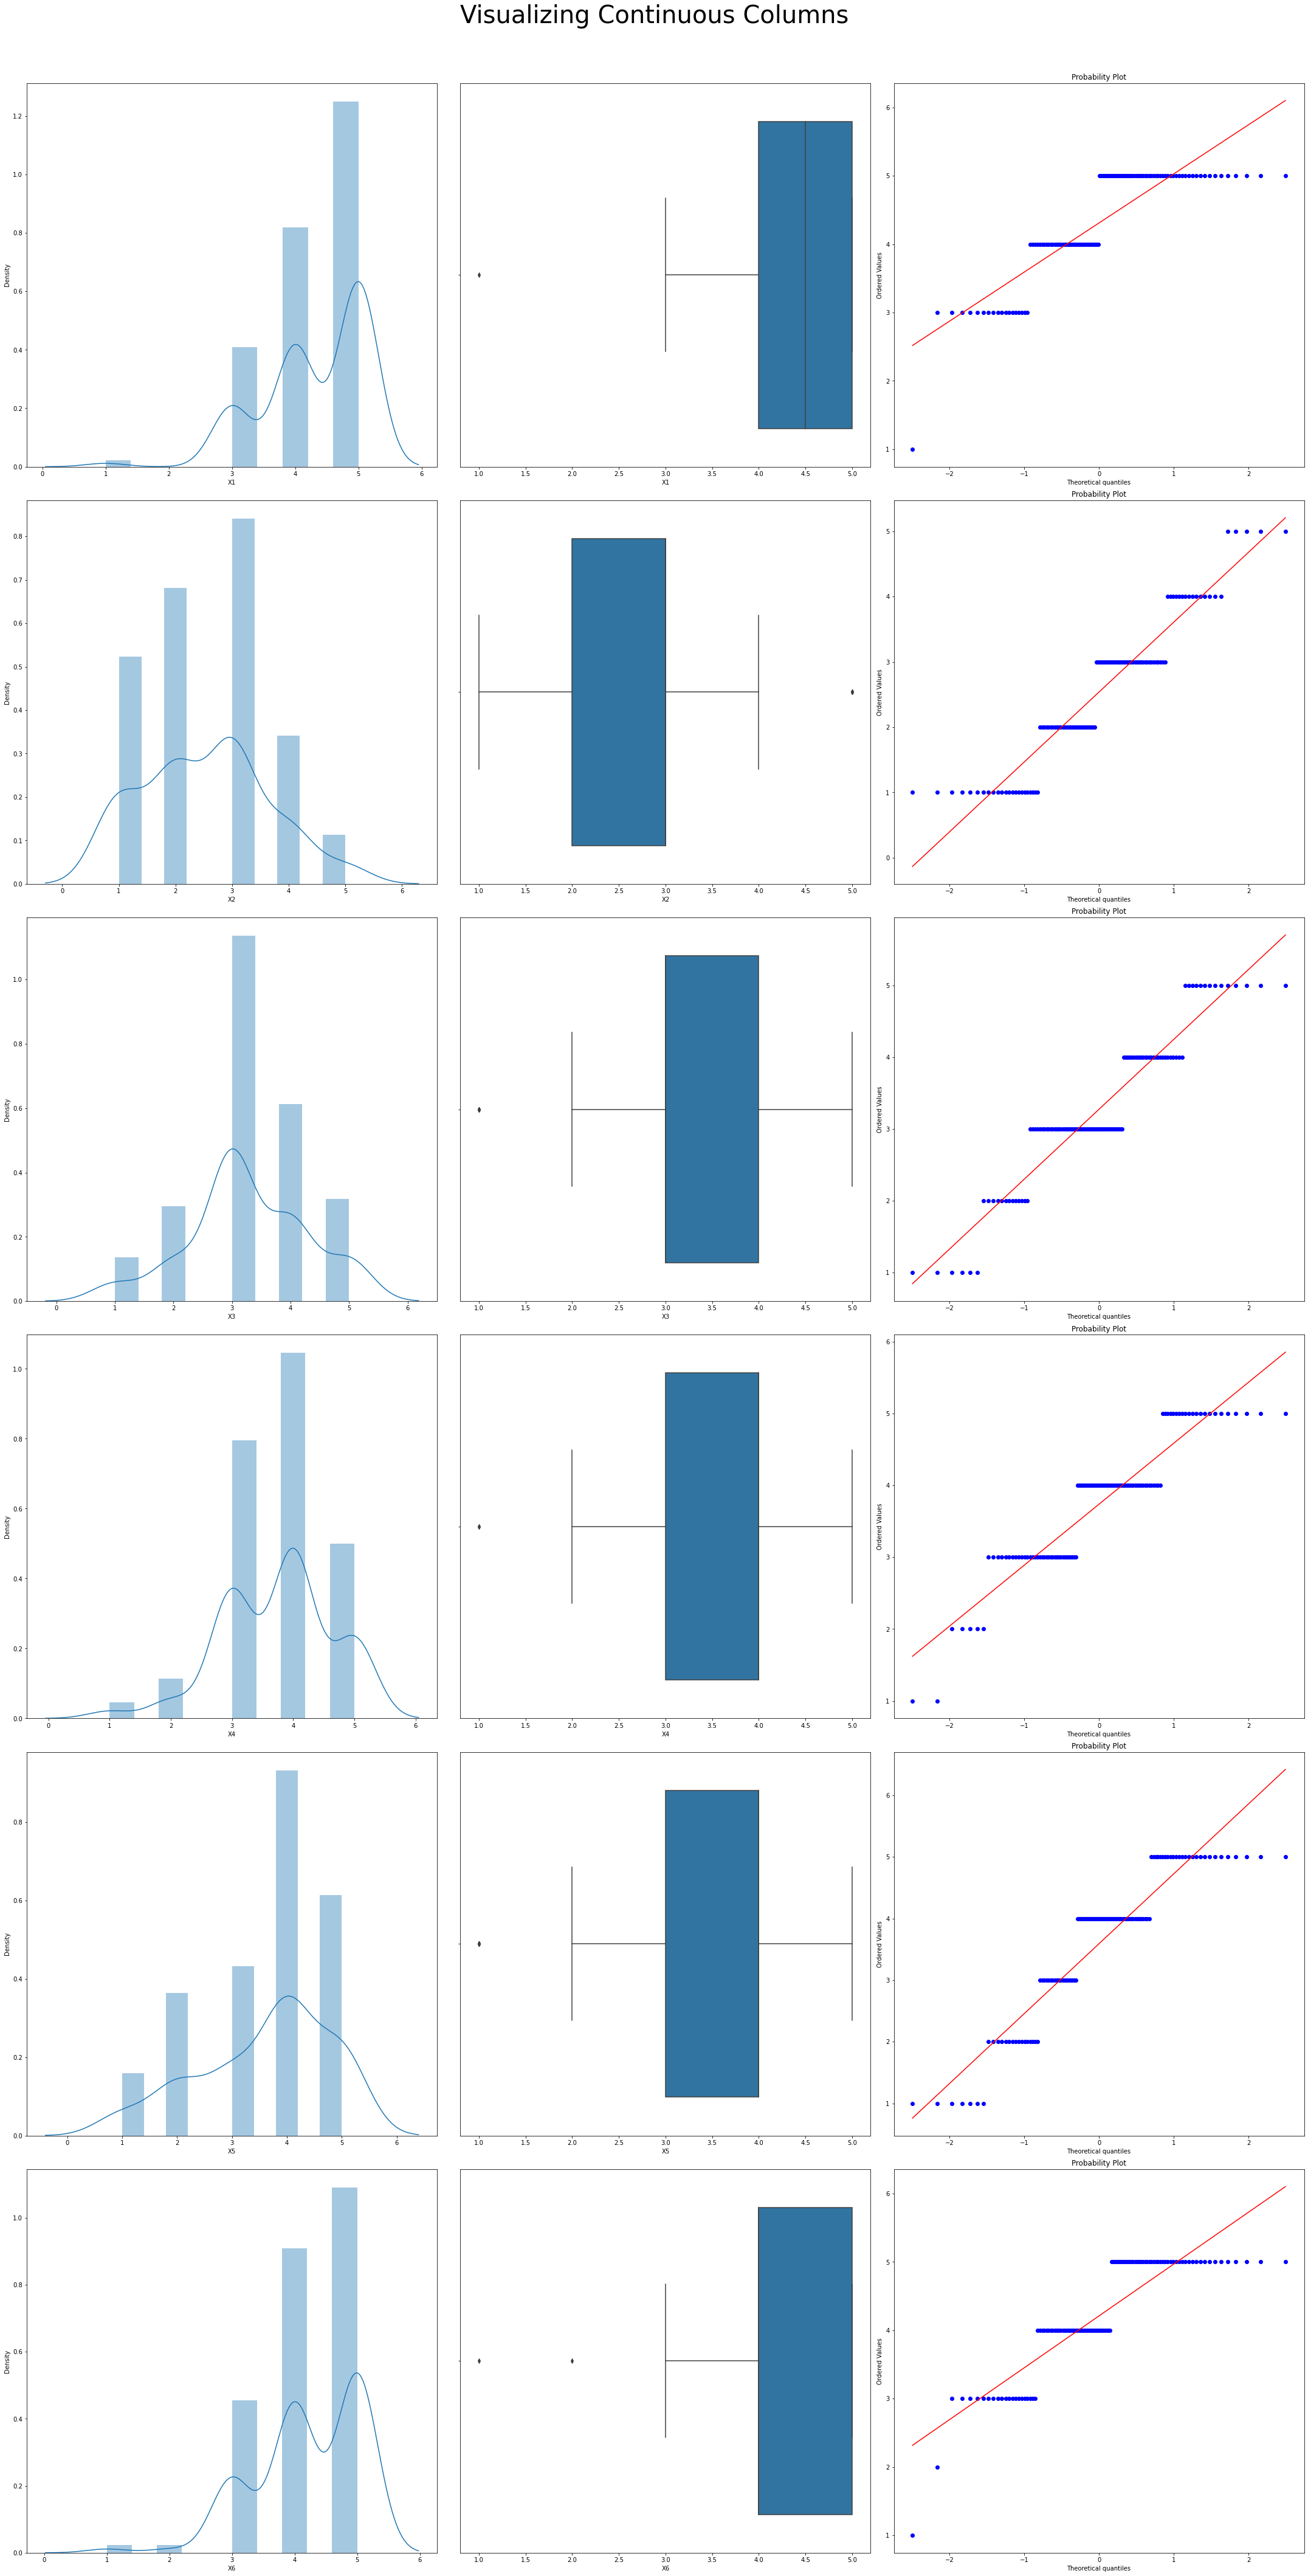

In [ ]:
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(6,3,figsize=(30,60))
for index,i in enumerate(df.iloc[:,1:7]):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=40)

In [ ]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
X1   -1.047402
X6   -0.892167
X5   -0.618201
X4   -0.467505
X3   -0.141364
Y    -0.036874
X2    0.258575
dtype: float64


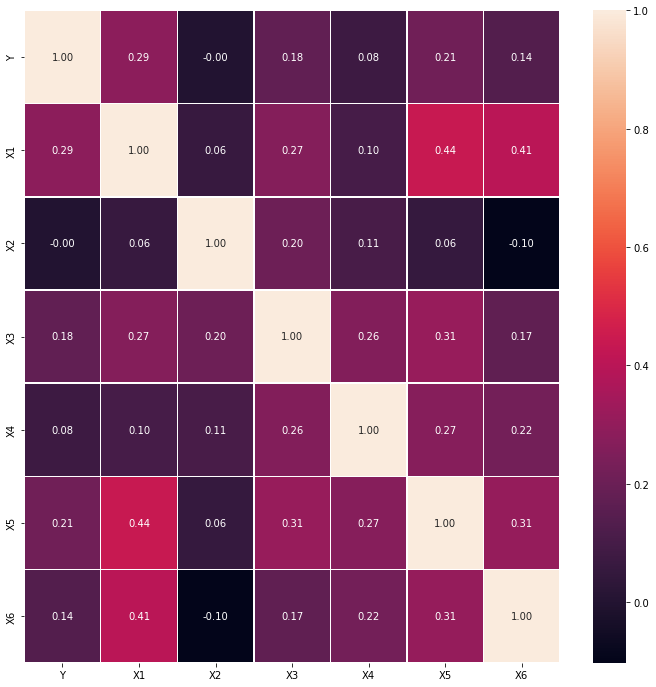

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

#Feature Selection and Preprocessing

I have divided feature selection into two categories for ease:

1- Manual Selection

Upon reading the project Description I analysed that 4 total features could be considered important regarding customer's needs. I have listed them below:

1.   X1
2.   X2
3.   X5
4.   X6

2- Statistical feature selection

This feature selection approach uses staticical measures to find useful features for training.

However full dataset is also used for training for comparison with feature selection apporaches.

To choose the method, just run the cell with its respective heading, e.g. run celect with heading Manual feature selection for manual selection and so on.

#Using Full Dataset

In [ ]:
#dataset slicing for Manual feature selection
#selecting feaures X1,X2,X5,X6
sliced_features = df.iloc[:,1:7]
sliced_labels = df['Y']

#removing outliers
#only keep rows in dataframe with all z-scores less than absolute value of 3 
z = np.abs(stats.zscore(sliced_features))
X_clean = sliced_features[(z<3).all(axis=1)]
y_clean = sliced_labels[(z<3).all(axis=1)]

#Balancing Dataset
sm = SMOTE()
X_clean, y_clean = sm.fit_resample(X_clean, y_clean)
print(X_clean.shape)
#scale and normalize the dataset
scaling = StandardScaler()
X_clean = scaling.fit_transform(X_clean)

(108, 6)


###Manual Feature Selection/Preprocessing

In [ ]:
#dataset slicing for Manual feature selection
#selecting feaures X1,X2,X5,X6
sliced_features = df.iloc[:, [1, 2, 5, 6]]
sliced_labels = df['Y']

#removing outliers
#only keep rows in dataframe with all z-scores less than absolute value of 3 
z = np.abs(stats.zscore(sliced_features))
X_clean = sliced_features[(z<3).all(axis=1)]
y_clean = sliced_labels[(z<3).all(axis=1)]

#Balancing Dataset
sm = SMOTE()
X_clean, y_clean = sm.fit_resample(X_clean, y_clean)

#scale and normalize the dataset
scaling = StandardScaler()
X_clean = scaling.fit_transform(X_clean)

###Feature selection using statistical measures

In [ ]:
#Slicing for feature selection with stats measures
sliced_features = df.iloc[:,1:7]
sliced_labels = df['Y']
sliced_features.head()

#feature selection
fs = SelectKBest(score_func=f_classif, k=4)
X_selected = fs.fit_transform(sliced_features, sliced_labels)

#Checking which features where selected
filter = fs.get_support()
feat = np.array(sliced_features.columns)
print('Total Features ', feat)
print('Selected Features for training ',feat[filter])

#removing outliers
#only keep rows in dataframe with all z-scores less than absolute value of 3 
z = np.abs(stats.zscore(X_selected))
X_clean = X_selected[(z<3).all(axis=1)]
y_clean = sliced_labels[(z<3).all(axis=1)]

#Balancing Dataset
#sm = SMOTE()
#X_clean, y_clean = sm.fit_resample(X_clean, y_clean)

#scale and normalize the dataset
scaling = StandardScaler()
X_clean = scaling.fit_transform(X_clean)

Total Features  ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']
Selected Features for training  ['X1' 'X3' 'X5' 'X6']


Feature list: ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']

Selected Features for training:  ['X1' 'X3' 'X5' 'X6']

#Train test split

In [ ]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [ ]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
print(X_train.shape)
print(X_test.shape)

(82, 4)
(28, 4)


#Method 1

# Parameters Optimization(Support Vector Machine)

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf','poly']}
svc=GridSearchCV(SVC(),param_grid,cv=5)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
confusion_svc=confusion_matrix(y_test,svc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {svc.best_params_}\n')

# Parameters Optimization(Decision tree classifier)

              precision    recall  f1-score   support

           0       0.59      0.71      0.65        14
           1       0.64      0.50      0.56        14

    accuracy                           0.61        28
   macro avg       0.61      0.61      0.60        28
weighted avg       0.61      0.61      0.60        28


Best Parameters of SVC model is : {'criterion': 'entropy', 'max_depth': 8}



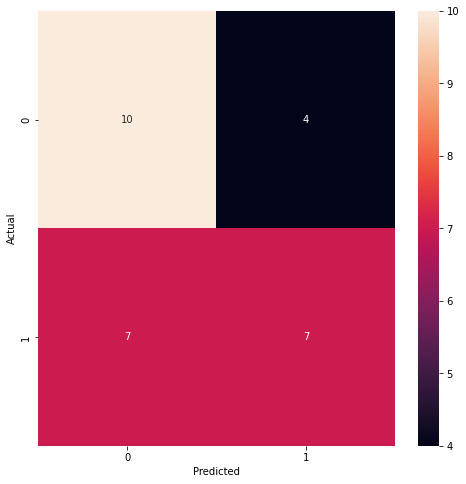

In [ ]:
param_grid={ 'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}
dtc=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
confusion_dtc=confusion_matrix(y_test,dtc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_dtc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_dtc))
print(f'\nBest Parameters of SVC model is : {dtc.best_params_}\n')

# Parameters Optimization (Logistic Regression)

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.75      0.64      0.69        14

    accuracy                           0.71        28
   macro avg       0.72      0.71      0.71        28
weighted avg       0.72      0.71      0.71        28


Best Parameter: {'C': 0.001, 'max_iter': 50, 'solver': 'liblinear'}



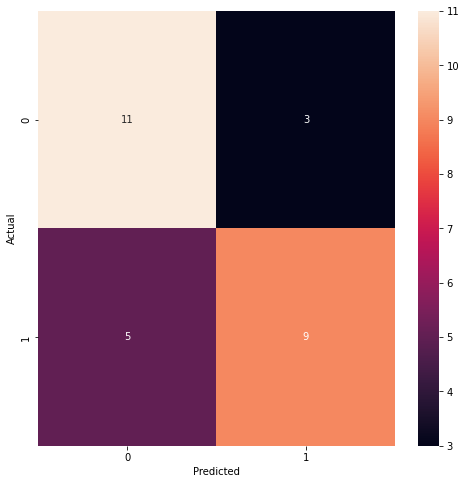

In [ ]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'max_iter':[50,75,100,200,300,400,500,700],
    'solver': ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
}
log=GridSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
print(f'\nBest Parameter: {log.best_params_}\n')

# Parameters Optimization(Random Forest Classifier)

In [ ]:
param_grid = {
    'n_estimators': [50, 75,100, 150, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,16],
    'criterion' :['gini', 'entropy']
}
rfc=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
confusion_rfc=confusion_matrix(y_test,rfc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rfc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rfc))
print(f'\nBest Parameter: {rfc.best_params_}\n')

#Parameters Optimization (Gradient Boosting Classifier)

In [ ]:
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

#Parameters Optimization (Voting Classifier)

In [ ]:
estimator = []
estimator.append(('RFC', 
                   RandomForestClassifier(n_estimators= 300, max_features= 'log2', max_depth= 8)))
estimator.append(('SVC', SVC(kernel='rbf', gamma= 1, C=100)))
estimator.append(('GBC', GradientBoostingClassifier(n_estimators = 50, learning_rate =0.05)))
            
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train,y_train)
y_pred= vot_hard.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

#Method 2


In [ ]:
XX_train = X_clean
YY_train = y_clean.to_numpy()

#Parameters Optimization (Decision Tree Classifier)

In [ ]:
# for GridsearchCV 
# define the model
dtc = DecisionTreeClassifier()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
#pca = decomposition.PCA()

In [ ]:
#creating a pipeline
pipe = Pipeline(steps=[('dtc', dtc)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dtc__criterion = criterion, dtc__max_depth = max_depth)

In [ ]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

#Parameters Optimization (Support Vector Machine)

In [ ]:
# for GridsearchCV 
# define the model
svc = SVC()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
pca = decomposition.PCA()

In [ ]:
#creating a pipeline
pipe = Pipeline(steps=[('svc', svc)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
C = [0.001,0.01,0.1,1,10,100]
gamma = [0.001,0.01,0.1,1,10,100]
kernel = ['linear','rbf','poly']
parameters = dict(svc__C = C, svc__gamma = gamma, svc__kernel = kernel)

In [ ]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

#Parameters Optimization (Logistic Regression)

In [ ]:
# for GridsearchCV 
# define the model
log = LogisticRegression()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
pca = decomposition.PCA()

In [ ]:
#creating a pipeline
pipe = Pipeline(steps=[('log', log)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001,0.01,0.1,1,10,100]
max_iter = [50,75,100,200,300,400,500,700]
parameters = dict(log__solver = solver, log__C = C, log__max_iter = max_iter)

In [ ]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

##Parameters Optimization (Gradient Boosting classifier)

In [ ]:
# for GridsearchCV 
# define the model
gbc = GradientBoostingClassifier()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
pca = decomposition.PCA()

In [ ]:
#creating a pipeline
pipe = Pipeline(steps=[('gbc', gbc)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [50, 75,100, 150, 200,300]
parameters = dict(gbc__learning_rate = learning_rate, gbc__n_estimators = n_estimators)

In [ ]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

##Parameters Optimization (Random Forest Classifier)

In [ ]:
# for GridsearchCV 
# define the model
rfc = RandomForestClassifier()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
pca = decomposition.PCA()

In [ ]:
#creating a pipeline
pipe = Pipeline(steps=[('rfc', rfc)])
#components used for pca
n_components = list(range(1,X_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
n_estimators = [10, 100, 500]
max_features = [2, 4, 6]
parameters = dict(rfc__n_estimators = n_estimators, rfc__max_features = max_features)

In [ ]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train.ravel())
    #get the best performing model fit on the whole training set
    best_model_rfc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_rfc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))